## **Importing the dataset**

To train the model for sentiment analysis

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
data=pd.read_csv("Train.csv")
data

,text,label
0,I grew up (b. 1965) watching and loving the Th...,0
1,"When I put this movie in my DVD player, and sa...",0
2,Why do people who do not know what a particula...,0
3,Even though I have great interest in Biblical ...,0
4,Im a die hard Dads Army fan and nothing will e...,1
...,...,...
39995,"""Western Union"" is something of a forgotten cl...",1
39996,This movie is an incredible piece of work. It ...,1
39997,My wife and I watched this movie because we pl...,0
39998,"When I first watched Flatliners, I was amazed....",1


# **Plotting bar graph**


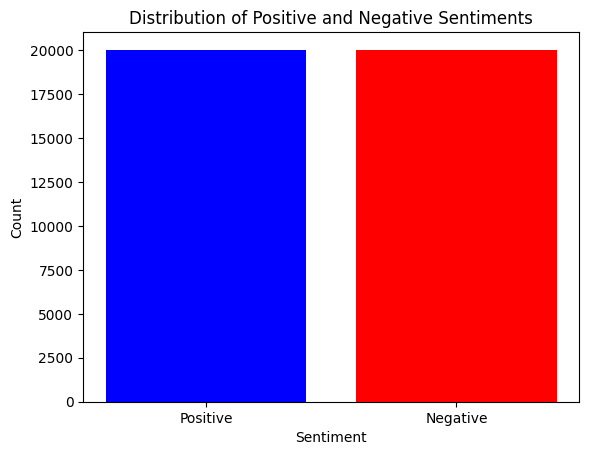

In [5]:
pos = data[data['label'] == 1]
neg = data[data['label'] == 0]

c = [pos['label'].count(), neg['label'].count()]

labels = ["Positive", "Negative"]

plt.bar(labels, c, color=["blue", 'red'])

plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.title('Distribution of Positive and Negative Sentiments')
plt.show()


# Preprocessing Text

In [6]:
import re
def preprocessor(text):
             text=re.sub('<[^>]*>','',text)
             emojis=re.findall('(?::|;|=)(?:-)?(?:\)|\(|D|P)',text)
             text=re.sub('[\W]+',' ',text.lower()) + ' '.join(emojis).replace('-','')
             return text
data['text']=data['text'].apply(preprocessor)

# Training Machine Learning Model for sentiment Analysis

# converting texts into feature vector

In [7]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf=TfidfVectorizer()
y=data.label.values
x=tfidf.fit_transform(data.text)


In [8]:
x

<40000x94585 sparse matrix of type '<class 'numpy.float64'>'
	with 5440296 stored elements in Compressed Sparse Row format>

In [9]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(x,y,random_state=42,test_size=0.3)

In [10]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [11]:
dt = DecisionTreeClassifier(random_state=42)
dt_parameters = {
            'criterion': ('gini', 'entropy'),
            'max_depth': (10, 40),
            'ccp_alpha': (0.01, 0.05),
        }


m_NB = MultinomialNB(fit_prior=True, class_prior=None)  

m_NB_parameters = {
            'alpha':(0,1),
            }
lr = LogisticRegression(solver='liblinear', class_weight='balanced')
lr_parameters = {
            'random_state': (0, 20, 42),
        }

rf = RandomForestClassifier(random_state =42)
rf_parameters = {
    'n_estimators': (50, 10),
     'max_depth': (10, 20)
}
models = [dt, lr, rf, m_NB]
model_parameter= [dt_parameters, lr_parameters, rf_parameters, m_NB_parameters] 

In [12]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

best_model = None
best_accuracy = 0

for model, model_par in zip(models, model_parameter):
    grid = GridSearchCV(model, model_par, scoring='accuracy', cv =5)

    grid.fit(X_train, y_train)

    print("best parameters = " ,grid.best_params_)
    grid_predictions_test= grid.predict(X_test)
    accuracy_test = accuracy_score(y_test, grid_predictions_test)
    
    
    grid_predictions_train = grid.predict(X_train)
    accuracy_train = accuracy_score(y_train, grid_predictions_train)

    print("accuracy of  ",model , "on training data", "-" ,accuracy_train)
    
    print("accuracy of  ",model , "on test data", "-" ,accuracy_test)

    if accuracy_test > best_accuracy:
        best_accuracy = accuracy_test
        best_model = model
        best_grid = grid

print("the best model is ", best_model," with the best accuracy ", best_accuracy )


best parameters =  {'ccp_alpha': 0.01, 'criterion': 'entropy', 'max_depth': 10}
accuracy of   DecisionTreeClassifier(random_state=42) on training data - 0.6898928571428572
accuracy of   DecisionTreeClassifier(random_state=42) on test data - 0.6865833333333333
best parameters =  {'random_state': 0}
accuracy of   LogisticRegression(class_weight='balanced', solver='liblinear') on training data - 0.9341428571428572
accuracy of   LogisticRegression(class_weight='balanced', solver='liblinear') on test data - 0.8909166666666667
best parameters =  {'max_depth': 20, 'n_estimators': 50}
accuracy of   RandomForestClassifier(random_state=42) on training data - 0.9271071428571429
accuracy of   RandomForestClassifier(random_state=42) on test data - 0.82325


C:\Users\sharm\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\naive_bayes.py:624: FutureWarning: The default value for `force_alpha` will change to `True` in 1.4. To suppress this warning, manually set the value of `force_alpha`.
  warnings.warn(
C:\Users\sharm\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\naive_bayes.py:633: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10. Use `force_alpha=True` to keep alpha unchanged.
  warnings.warn(
C:\Users\sharm\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\naive_bayes.py:624: FutureWarning: The default value for `force_alpha` will change to `True` in 1.4. To suppress this warning, manually set the value of `force_alpha`.
  warnings.warn(
C:\Users\sharm\AppD

best parameters =  {'alpha': 1}
accuracy of   MultinomialNB() on training data - 0.9094285714285715
accuracy of   MultinomialNB() on test data - 0.8615
the best model is  LogisticRegression(class_weight='balanced', solver='liblinear')  with the best accuracy  0.8909166666666667


# Importing the Tweet dataset

In [24]:
biden = pd.read_csv("Bidenall2.csv")
Trump = pd.read_csv("Trumpall2.csv")

In [25]:
import re
def preprocessor(text):
             text=re.sub('<[^>]*>','',text)
             emojis=re.findall('(?::|;|=)(?:-)?(?:\)|\(|D|P)',text)
             text=re.sub('[\W]+',' ',text.lower()) + ' '.join(emojis).replace('-','')
             return text   

biden['text'] = biden['text'].apply(preprocessor)
Trump['text'] = Trump['text'].apply(preprocessor)

In [26]:
biden_test=tfidf.fit_transform(biden.text)
trump_test=tfidf.fit_transform(Trump.text)

In [27]:
biden_test.shape

(2540, 5302)

# reshaping to fit into the model

In [28]:
desired_size_biden = (biden_test.shape[0], x.shape[1])
desired_size_trump = (trump_test.shape[0], x.shape[1]) 

import scipy.sparse

biden_test1 = scipy.sparse.csr_matrix(biden_test,(desired_size_biden), dtype= float)
trump_test1 = scipy.sparse.csr_matrix(trump_test,(desired_size_trump), dtype= float)


In [29]:
trump_test1

<2788x94585 sparse matrix of type '<class 'numpy.float64'>'
	with 33742 stored elements in Compressed Sparse Row format>

In [30]:
biden_pred = best_grid.predict(biden_test1)
trump_pred = best_grid.predict(trump_test1)

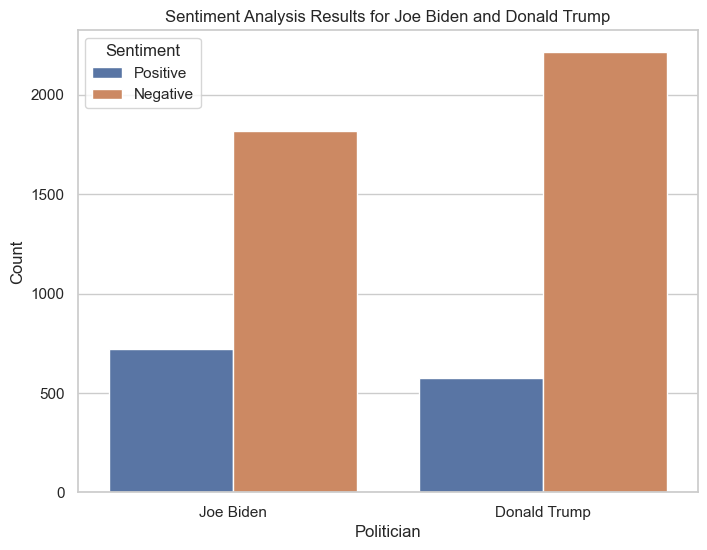

In [31]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate counts for both datasets
count_of_ones_biden = np.sum(biden_pred == 1)
count_of_zeros_biden = np.sum(biden_pred == 0)

count_of_ones_trump = np.sum(trump_pred == 1)
count_of_zeros_trump = np.sum(trump_pred == 0)

# Create labels and counts for politicians
Politicians = ['Joe Biden', 'Donald Trump']
lis_pos = [count_of_ones_biden, count_of_ones_trump]
lis_neg = [count_of_zeros_biden, count_of_zeros_trump]


df = pd.DataFrame({
    'Politician': Politicians * 2,
    'Sentiment': ['Positive'] * len(Politicians) + ['Negative'] * len(Politicians),
    'Count': lis_pos + lis_neg
})

# Plot using seaborn
sns.set(style="whitegrid")
plt.figure(figsize=(8, 6))
sns.barplot(x='Politician', y='Count',hue = 'Sentiment', data=df)
plt.title('Sentiment Analysis Results for Joe Biden and Donald Trump')
plt.ylabel('Count')
plt.show()


In [32]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg


image_biden = 'biden.jpeg'
image_trump = 'trump.jpeg'





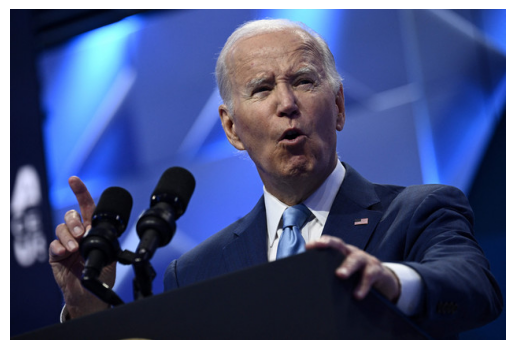

Predicted winner is :  Biden


In [33]:
ratio_biden = count_of_ones_biden / count_of_zeros_biden
ratio_trump = count_of_ones_trump / count_of_zeros_trump


if ratio_biden > ratio_trump:
    winner = "Biden"
    img_biden = mpimg.imread(image_biden)
    plt.imshow(img_biden)
    plt.axis('off')  
    plt.show()
elif ratio_trump > ratio_biden:
    winner = "Trump"
    img_trump = mpimg.imread(image_trump)
    plt.imshow(img_trump)
    plt.axis('off')  
    plt.show()
else:
    winner = "No winner, ratios are equal"

print("Predicted winner is : ", winner)
